<h2 align='center' style='color:blue'> Outlier removal </h2>

- Standard deviation


- Z Score

-------------------------------------------------------------------------------------------------------------------------------

bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

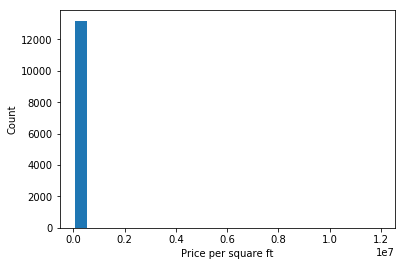

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

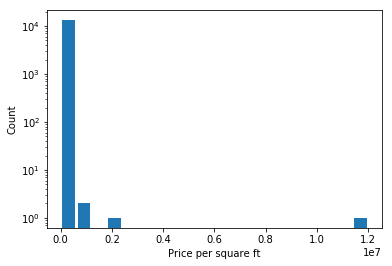

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [7]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [8]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [9]:
df.shape

(13200, 7)

In [10]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [11]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [12]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5654,other,4 Bedroom,4920.0,5.0,1150.0,4,23373
10327,Cunningham Road,4 Bedroom,7500.0,6.0,1800.0,4,24000
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
2632,other,4 Bedroom,2400.0,4.0,700.0,4,29166
8499,other,4 BHK,7400.0,5.0,1850.0,4,25000
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
3340,other,19 BHK,2000.0,16.0,490.0,19,24500
12607,HAL 2nd Stage,8 Bedroom,1000.0,7.0,260.0,8,26000
6524,other,3 Bedroom,700.0,3.0,195.0,3,27857


In [13]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [14]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

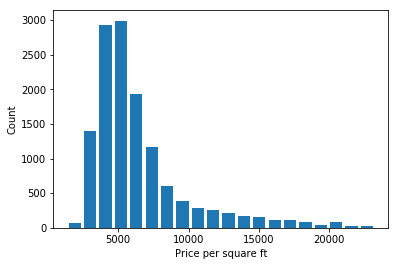

In [15]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

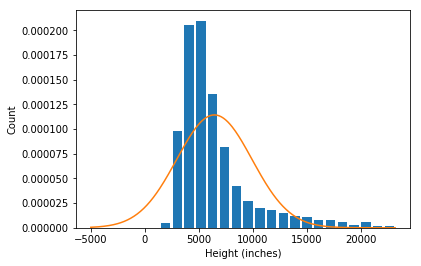

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [17]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
1404,Banashankari Stage II,2 BHK,1700.0,2.0,150.0,2,8823,0.521453
6153,Hulimavu,3 BHK,3035.0,5.0,220.0,3,7248,0.141112
8839,Sarjapur,2 BHK,1044.0,2.0,34.0,2,3256,-0.822902
9235,Devanahalli,3 BHK,1550.0,3.0,85.0,3,5483,-0.285112
1397,Babusapalaya,3 BHK,1611.0,2.0,66.0,3,4096,-0.620053
2496,7th Phase JP Nagar,3 BHK,2200.0,3.0,190.0,3,8636,0.476295
9070,Thanisandra,2 BHK,1343.0,2.0,75.0,2,5584,-0.260722
12131,Bellandur,2 BHK,850.0,2.0,45.0,2,5294,-0.330753
9690,Bharathi Nagar,2 BHK,1328.0,2.0,69.0,2,5195,-0.354660
5011,Marathahalli,3 BHK,1730.0,3.0,110.0,3,6358,-0.073811


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [19]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961,4.660046
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509,4.309408
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000,10.465136
12607,HAL 2nd Stage,8 Bedroom,1000.0,7.0,260.0,8,26000,4.669464


In [20]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [21]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation